In [421]:
## Problem Statement

## In this Project, we will try to predict the Avocado’s Average Price based on different features.
## Lets categorise data in different types.

#1) Categorical: region,type
#2) Date: Date
#3) Numerical: Total Volume, 4046, 4225, 4770, Total Bags, Small Bags,Large Bags,XLarge Bags,Year
#4)Target: AveragePrice

In [422]:
## Lets import some important library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot
sns.set(style='white', context='notebook', palette='deep')
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
%config Completer.use_jedi = False
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [423]:
df= pd.read_csv(r"C:\Users\Homa\avocado.csv")

In [424]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [425]:
df.shape

(18249, 14)

In [426]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [427]:
from sklearn.preprocessing import OrdinalEncoder
enc= OrdinalEncoder()
for i in df.columns:
    if df[i].dtype=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [428]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  float64
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  float64
 12  year          18249 non-null  int64  
 13  region        18249 non-null  float64
dtypes: float64(12), int64(2)
memory usage: 1.9 MB


In [429]:
df.describe()
## There are no null Value.
## We can see there are lots of outliers and skewness

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,18249.000000,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,24.232232,83.999233,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,0.499918,2016.147899,26.495644
std,15.481045,48.787516,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.500014,0.939938,15.583788
min,0.000000,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,2015.000000,0.000000
25%,10.000000,42.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,0.000000,2015.000000,13.000000
50%,24.000000,84.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,0.000000,2016.000000,26.000000
75%,38.000000,126.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,1.000000,2017.000000,40.000000
max,52.000000,168.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,1.000000,2018.000000,53.000000


In [430]:
## We can see all columns having 18249 data which means it doesn't contain missing values.
## Lets verify it by checking null value for each columns.
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [431]:
##We cn see Date is object type not data type. We need to work on it.
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

In [432]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,0,1970-01-01 00:00:00.000000150,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,2015,0.0,1,1
1,1,1970-01-01 00:00:00.000000111,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,2015,0.0,1,1
2,2,1970-01-01 00:00:00.000000072,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,2015,0.0,1,1
3,3,1970-01-01 00:00:00.000000033,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,2015,0.0,1,1
4,4,1970-01-01 00:00:00.000000160,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,2015,0.0,1,1


In [433]:
##Lets divide data into two features(x) and Label(y)
x=df.drop("AveragePrice", axis=1)
y=df['AveragePrice']

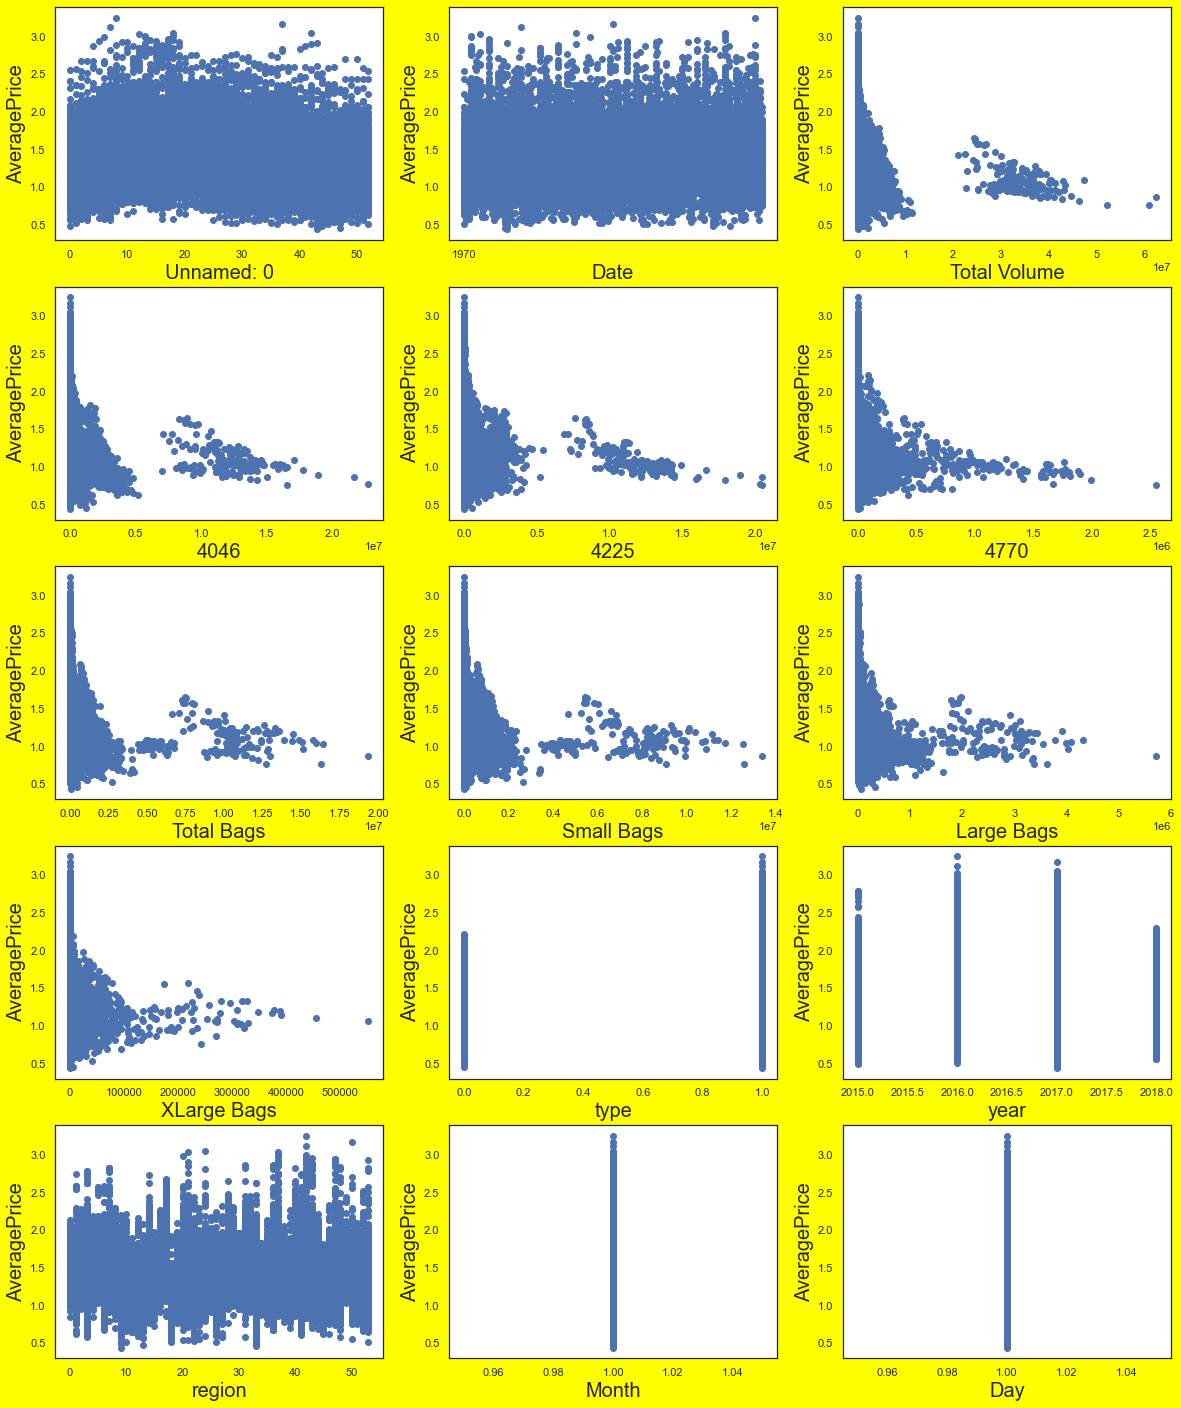

In [434]:
plt.figure(figsize=(20,30),facecolor='yellow')
plotnumber=1
for column in x:
    if plotnumber<=15:
        ax=plt.subplot(6,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('AveragePrice',fontsize=20)
        
        plotnumber+=1
        
plt.show()

In [435]:
##Lets drop unwanted 
df.drop('Unnamed: 0',axis=1,inplace=True)
df.drop('Date',axis=1,inplace=True)
df.drop('Day',axis=1,inplace=True)
df.drop('region',axis=1,inplace=True)
df.drop('Month',axis=1,inplace=True)


In [436]:
##Lets divide data into two features(x) and Label(y)
x=df.drop("AveragePrice", axis=1)
y=df['AveragePrice']

In [437]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,2015
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,2015
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,2015
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,2015


In [438]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,2015
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,2015
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,2015
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,2015
...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1.0,2018
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1.0,2018
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1.0,2018
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1.0,2018


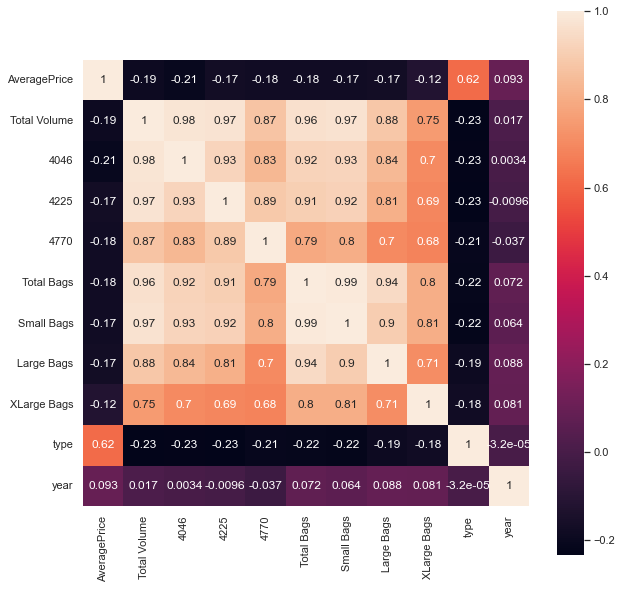

In [439]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(method='pearson'), annot=True, square=True)
plt.show()

In [440]:
df_ = ['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']

Total Volume
9.006947063504116


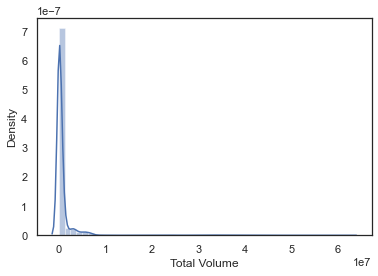

4046
8.647508889260688


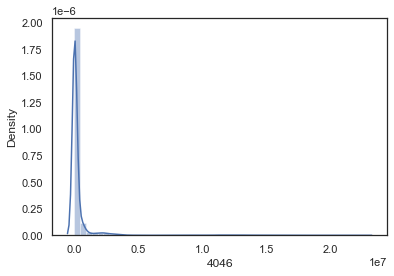

4225
8.941730553303788


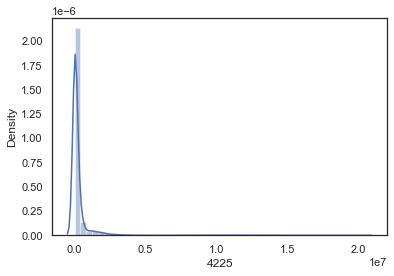

4770
10.158560543509228


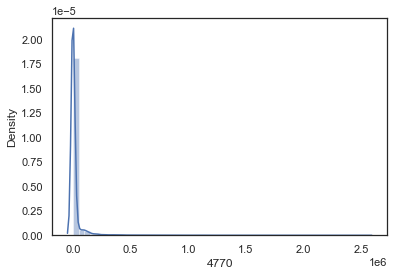

Total Bags
9.755269739145234


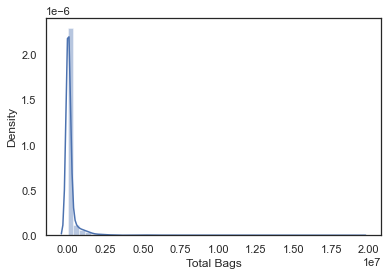

Small Bags
9.539875757048327


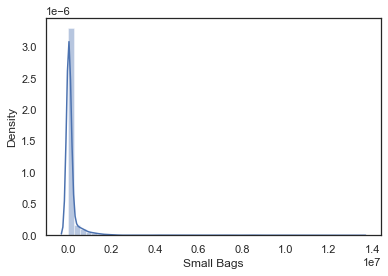

Large Bags
9.79564934814773


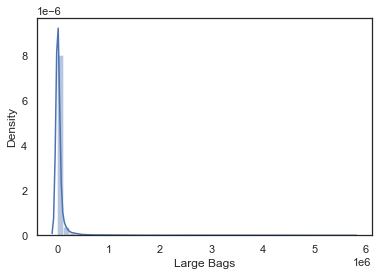

XLarge Bags
13.138670622657223


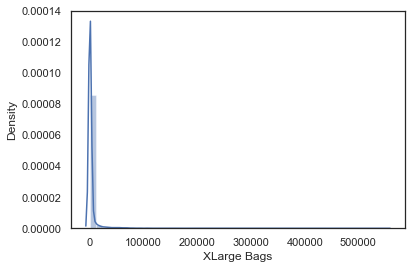

In [441]:
from scipy.stats import skew
for i in df_:
    print(i)
    print(skew(df[i]))
    plt.figure()
    sns.distplot(df[i])
    
    plt.show()

In [442]:
df['Total Volume']=np.log(df['Total Volume'])
df['4046']=np.sqrt(df['4046'])
df['4225']=np.sqrt(df['4225'])
df['4770']=np.sqrt(df['4770'])
df['Total Bags']=np.sqrt(df['Total Bags'])
df['Small Bags']=np.sqrt(df['Small Bags'])
df['Large Bags']=np.sqrt(df['Large Bags'])
df['XLarge Bags']=np.sqrt(df['XLarge Bags'])

Total Volume
0.0879472545662242


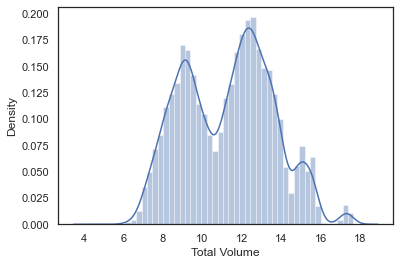

4046
3.952647336759692


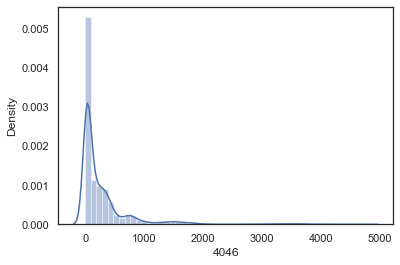

4225
3.8960349616092573


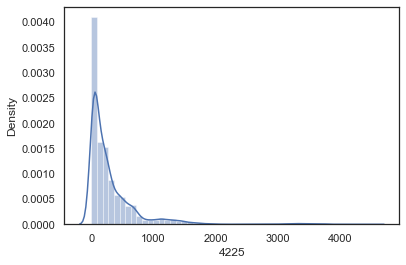

4770
4.1282654983695295


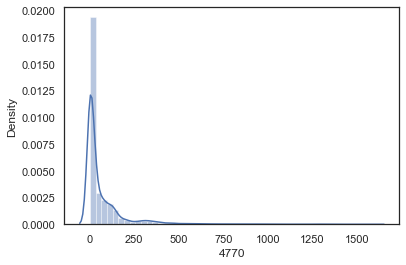

Total Bags
4.128524957305023


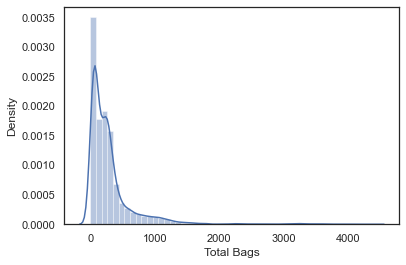

Small Bags
4.035608456122971


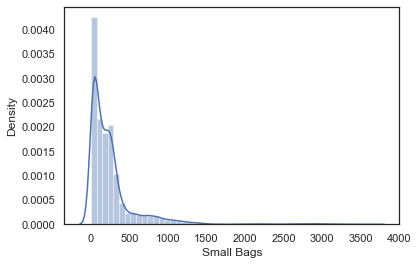

Large Bags
4.134623168685457


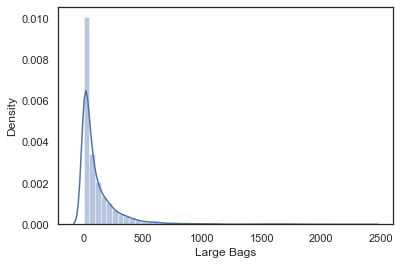

XLarge Bags
4.826970996188973


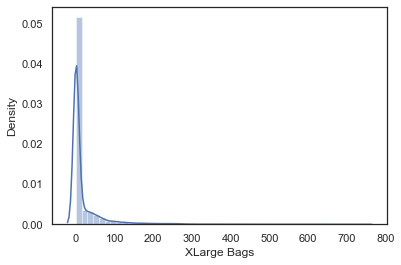

In [443]:
from scipy.stats import skew
for i in df_:
    print(i)
    print(skew(df[i]))
    plt.figure()
    sns.distplot(df[i])
    
    plt.show()

In [444]:
## Let Normalize skewed continous data
print(skew(df['Total Volume']))
print(skew(df['4046']))
print(skew(df['4225']))
print(skew(df['4770']))
print(skew(df['Small Bags']))
print(skew(df['Large Bags']))
print(skew(df['XLarge Bags']))

0.0879472545662242
3.952647336759692
3.8960349616092573
4.1282654983695295
4.035608456122971
4.134623168685457
4.826970996188973


In [445]:
np.sqrt(-1)

nan

AveragePrice        AxesSubplot(0.125,0.71587;0.133621x0.16413)
Total Volume     AxesSubplot(0.285345,0.71587;0.133621x0.16413)
4046              AxesSubplot(0.44569,0.71587;0.133621x0.16413)
4225             AxesSubplot(0.606034,0.71587;0.133621x0.16413)
4770             AxesSubplot(0.766379,0.71587;0.133621x0.16413)
Total Bags         AxesSubplot(0.125,0.518913;0.133621x0.16413)
Small Bags      AxesSubplot(0.285345,0.518913;0.133621x0.16413)
Large Bags       AxesSubplot(0.44569,0.518913;0.133621x0.16413)
XLarge Bags     AxesSubplot(0.606034,0.518913;0.133621x0.16413)
type            AxesSubplot(0.766379,0.518913;0.133621x0.16413)
year               AxesSubplot(0.125,0.321957;0.133621x0.16413)
dtype: object

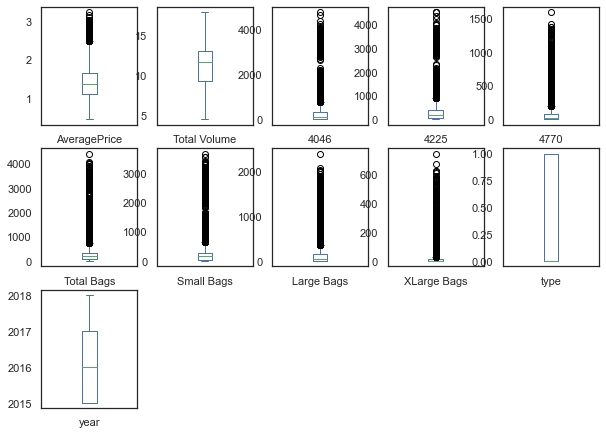

In [446]:
df.plot(kind='box',subplots=True,layout=(4,5),figsize=(10,10))

In [447]:
from scipy.stats import zscore
z= np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([  312,   313,   314, ..., 17402, 17428, 17487], dtype=int64),
 array([4, 4, 4, ..., 0, 0, 7], dtype=int64))

In [448]:
df= df[(z<3).all(axis=1)]
df.shape

(17129, 11)

In [449]:
Data_loss=((18249-17129)/18249)*100

In [450]:
Data_loss

6.137322593018796

In [451]:
## Since data loss is less than 10%. We can consider it.

In [452]:
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year'],
      dtype='object')

In [453]:
## Lets do scaling to avoid partiality by model on the basis of number size.
from sklearn.preprocessing import StandardScaler
Scaler= StandardScaler()
x_scaled=Scaler.fit_transform(x)

In [454]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns
vif

,VIF Factor,features
0,5.211649e+09,Total Volume
1,6.945956e+08,4046
2,6.332029e+08,4225
3,4.972627e+06,4770
4,2.502000e+14,Total Bags
5,1.429714e+14,Small Bags
6,1.521486e+13,Large Bags
7,7.855435e+10,XLarge Bags
8,2.120007e+00,type
9,2.246220e+00,year


In [455]:

#Creating training and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)




In [456]:
x_train

array([[-0.24476024, -0.23151903, -0.24440349, ..., -0.17557961,
         1.00016441,  0.90657512],
       [-0.07877138, -0.1086765 , -0.11803471, ..., -0.17557961,
        -0.99983562, -0.15735346],
       [-0.2444436 , -0.23003386, -0.24302668, ..., -0.17557961,
         1.00016441, -0.15735346],
       ...,
       [-0.22216513, -0.23085115, -0.19949057, ..., -0.17557961,
        -0.99983562, -0.15735346],
       [-0.16593986, -0.1978271 , -0.12852124, ..., -0.08476892,
        -0.99983562, -1.22128204],
       [-0.24528874, -0.23118652, -0.24395591, ..., -0.17557961,
         1.00016441,  0.90657512]])

In [457]:
y_train

16391    1.88
4990     0.81
13653    2.01
2074     1.02
12377    1.53
         ... 
11284    1.55
11964    1.55
5390     1.31
860      1.13
15795    1.35
Name: AveragePrice, Length: 14599, dtype: float64

In [458]:

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)

In [459]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.2409765503264044
MSE: 0.097609903507813
RMSE: 0.3124258368122153


In [460]:
##The RMSE is low so we can say that we do have a good model, but lets check to be more sure.
##Lets plot the y_test vs the predictions

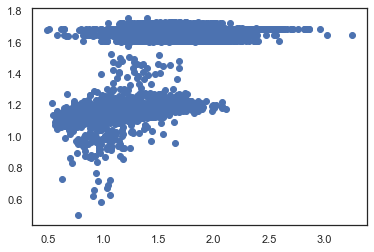

In [461]:
plt.scatter(x=y_test,y=pred)

In [462]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)

Text(0, 0.5, 'Predicted Y')

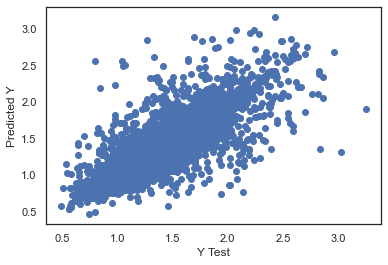

In [463]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [464]:
## We can see we got a straight line. so it is better model than LinearRegression. 
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.1599917808219178
MSE: 0.06368572602739726
RMSE: 0.25236030992887387


In [465]:
## We can see RMSE of DecisionTreeRegressor model is lower than LinearRegression. Hence this is better model compritevely.

In [466]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(x_train,y_train)
pred=rdr.predict(x_test)


,Y Test,Pred
8604,0.82,1.0371
2608,0.97,1.0044
14581,1.44,1.3796
4254,0.97,0.9142
16588,1.45,1.4705


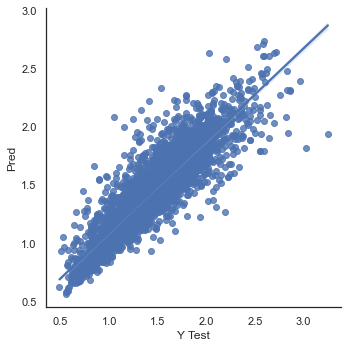

In [467]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

In [468]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.12248427397260273
MSE: 0.03170007875068493
RMSE: 0.17804515930146747


In [469]:
## RMSE is least in RandomForestRegressor Model. So this is the best model.

In [470]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,Ridge
from sklearn import metrics
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,100))}
ls=Lasso()
z=GridSearchCV(ls,parameters)
z.fit(x_train,y_train)
print(z.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [475]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
pred=ls.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('MSE:',metrics.mean_squared_error(y_test,pred))
print('MAE:',metrics.mean_absolute_error(y_test,pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: -0.00019463576641443048
MSE: 0.16070035526786625
MAE: 0.32249850646553946
RMSE: 0.4008744881728772


In [476]:
parameters={'alpha':[0.001,0.01,0.1,1,10],'solver':['auto','svd','cholesky','lsqr','sparse_cg','sag','saga']}
rd=Ridge()
z_=GridSearchCV(rd,parameters)
z_.fit(x_train,y_train)
print(z_.best_params_)

{'alpha': 1, 'solver': 'sag'}


In [477]:
rd=Ridge(alpha=10,solver='sag')
rd.fit(x_train,y_train)
pred=rd.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('MSE:',metrics.mean_squared_error(y_test,pred))
print('MAE:',metrics.mean_absolute_error(y_test,pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.3924259281378969
MSE: 0.09761836917368383
MAE: 0.24098413467584803
RMSE: 0.31243938479917


In [478]:
## Conclusions
##  I have done EDA using Pandas and other plotting libraries.
##  Also made use of packages like matplotlib, plotly and seaborn to develop better insights about the data.
## I have also seen how preproceesing helps in dealing with missing values and irregualities present in the data.
## I also learnt how to create new features which will in turn help us to better predict the survival.
## I get to know what are the features on which price is highly positively and negatively coorelated with.
## I came to know through analysis which model will be work with better accuracy with the help of low residual and RMSE scores.
## This project helped me to understand which model to choose first and go step by step to attain results with good accuracy. 
## Also get to know where to use Linear, Decision Tree and other applicable and required models to fine tune the predictions.